# Example of ExitStack

In [1]:
import qcodes as qc
import time
import os
import numpy as np
from IPython.display import Image
from qcodes.tests.instrument_mocks import DummyChannelInstrument
from qcodes import load_or_create_experiment, initialise_database, initialise_or_create_database_at
from qcodes import Measurement
from qcodes.dataset.plotting import plot_by_id
from contextlib import ExitStack

In [2]:
db_file_path = os.path.join(os.getcwd(), 'plottr_test.db')
initialise_or_create_database_at(db_file_path)
exp = load_or_create_experiment(experiment_name='plotting',
                          sample_name="no sample")


In [3]:
ins_one = DummyChannelInstrument(name='ins_one')

In [4]:
ins_one.A.dummy_n_points(10)
ins_one.A.dummy_n_points_2(20)
ins_one.A.dummy_start(0)
ins_one.A.dummy_stop(100)



ins_one.B.dummy_n_points(10)
ins_one.B.dummy_n_points_2(20)
ins_one.B.dummy_start(0)
ins_one.B.dummy_stop(100)

In [5]:
getters = (ins_one.A.dummy_parameter_with_setpoints, ins_one.B.dummy_parameter_with_setpoints)


runlist = []
for get in getters:
    meas = Measurement()
    meas.register_parameter(ins_one.A.temperature)
    meas.register_parameter(get, setpoints=(ins_one.A.temperature,))
    runlist.append(meas.run())



Starting experimental run with id: 44. 
Starting experimental run with id: 45. 


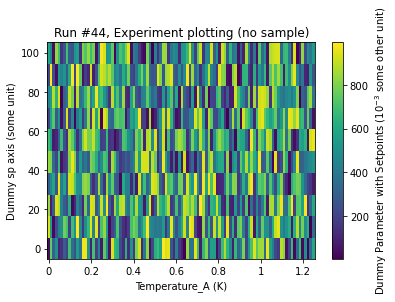

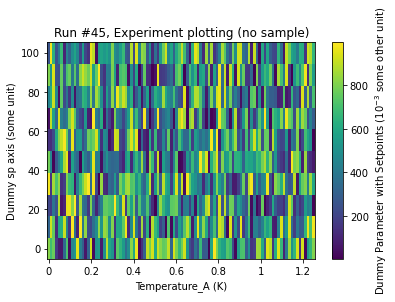

In [6]:
datasaverlist = []
with ExitStack() as cmx:
    for run in runlist:
        cmx.enter_context(run)
        datasaverlist.append(run.datasaver)
    for temp in np.linspace(0, 1.25, 100):
        time.sleep(0.1)
        for i, datasaver in enumerate(datasaverlist):
            dummy = getters[i].get()
            datasaver.add_result((ins_one.A.temperature, temp),
                             (getters[i], dummy))

plot = plot_by_id(datasaver.run_id-1)
plot = plot_by_id(datasaver.run_id)